# Description des données et du but de notre analyse



## Informations globales des données
Le dataset consiste en 12,330 sessions.
L'ensemble de données a été formé de sorte que chaque session appartienne à un utilisateur différent sur une période d'un an pour éviter toute tendance à une campagne, un jour spécial, un profil d'utilisateur ou une période spécifique.

## Informations spécifiques des colonnes du jeu de données
L'ensemble de données comprend 10 attributs numériques et 8 attributs catégoriels. L'attribut 'Revenue' peut être utilisé comme étiquette de classe.

"Administrative", "Administrative Duration", "Informational", "Informational Duration", "Product Related" et "Product Related Duration"  représentent le nombre de différents types de pages visitées par le visiteur au cours de cette session et le temps total passé dans chacune des ces catégories de page. Les valeurs de ces fonctionnalités sont dérivées des informations URL des pages visitées par l'utilisateur et mises à jour en temps réel lorsqu'un utilisateur effectue une action, par ex. passer d'une page à une autre.

Les features "Bounce Rate", "Exit Rate" and "Page Value" représentent les statistiques mesurées par "Google Analytics" pour chaque page du site de commerce électronique. La valeur de la fonctionnalité "Taux de rebond" pour une page Web fait référence au pourcentage de visiteurs qui accèdent au site à partir de cette page, puis la quittent ("Bounce Rate") sans déclencher d'autres demandes au serveur d'analyse au cours de cette session. La valeur de la fonctionnalité "Taux de sortie" pour une page Web spécifique est calculée comme pour toutes les pages vues de la page, le pourcentage qui était le dernier dans la session. La fonctionnalité "Page Value" représente la valeur moyenne d'une page Web visitée par un utilisateur avant d'effectuer une transaction de commerce électronique.

La feature "Special Day" indique la proximité de l'heure de visite du site avec un jour spécial spécifique (par exemple, la fête des mères, la Saint-Valentin) au cours duquel les sessions sont plus susceptibles d'être finalisées avec une transaction. La valeur de cet attribut est déterminée en considérant la dynamique du commerce électronique telle que la durée entre la date de commande et la date de livraison. Par exemple, pour le jour de Valentina, cette valeur prend une valeur différente de zéro entre le 2 février et le 12 février, zéro avant et après cette date sauf si elle est proche d'un autre jour spécial et sa valeur maximale de 1 le 8 février.

L'ensemble de données comprend également le système d'exploitation, le navigateur, la région, le type de trafic, le type de visiteur en tant que visiteur de retour ou nouveau visiteur, une valeur booléenne indiquant si la date de la visite est le week-end et le mois de l'année.


# Compréhension des données

## Importation des données

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import random
import sklearn
import seaborn as sns
import numpy as np

import bokeh
from bokeh.models import ColumnDataSource, HoverTool, LinearColorMapper, CustomJS, Slider, TapTool, TextInput
from bokeh.palettes import Category20
from bokeh.transform import linear_cmap, transform
from bokeh.io import output_file, show, output_notebook
from bokeh.plotting import figure
from bokeh.models import RadioButtonGroup, TextInput, Div, Paragraph
from bokeh.layouts import column, widgetbox, row, layout
from bokeh.layouts import column

from tqdm import tqdm

import seaborn as sns
import numpy as np

from sklearn.linear_model import LogisticRegression


In [5]:
dataframe = pd.read_csv("./online_shoppers_intention.csv") #si executé dans colab
# dataframe = pd.read_csv("./data/online_shoppers_intention.csv") #si executé en local


In [ ]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [ ]:
dataframe

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False


## Analyse exploratoire des données

In [ ]:
def add_prop(group) :
  group['total_region'] = len(group)
  group['achat_region'] = len(group[(group.Revenue==1)])
  return group


def analyse_graphique(dataframe, domain) : 
    
    plt.figure(figsize=(18, 5))

    plt.subplot(131)
    plt.title("Nombre de visites par " + domain)
    dataframe[domain].value_counts().plot.bar()
    plt.xlabel(domain) 
    plt.ylabel('Nombre de visites') 

    plt.subplot(132)
    plt.title("Nombre d'achats par " + domain)
    dataframe[dataframe['Revenue']][domain].value_counts().plot.bar()
    plt.xlabel(domain) 
    plt.ylabel("Nombre d'achats")


    dataframe[domain] = dataframe[domain].astype('category')
    df_test = dataframe.groupby([domain]).apply(add_prop)

    df_test['prop_achat']=df_test.achat_region /df_test.total_region
    df_test

    df_test=df_test.groupby(domain).prop_achat.min()

    plt.subplot(133)
    plt.title("Proportion d'achat par " + domain)
    df_test.plot.bar()
    plt.xlabel(domain) 
    plt.ylabel("Proportion de visites se terminant par un achat")

    plt.show()
    

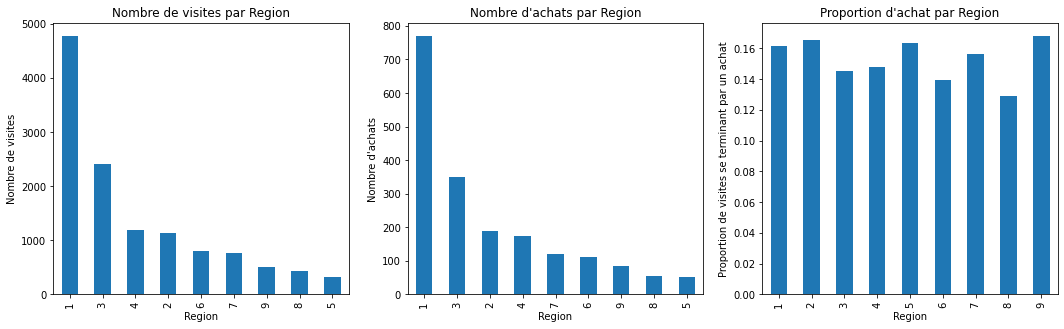

In [ ]:
analyse_graphique(dataframe, "Region")

On observe que deux régions se distinguent des autres sur les deux schémas de gauche.
Cependant, cette tendance n'est pas confirmée sur le troisième graphique.

Nous pensons donc que la région ne possèdera pas un grand impact sur les différents modèles de machine learning.

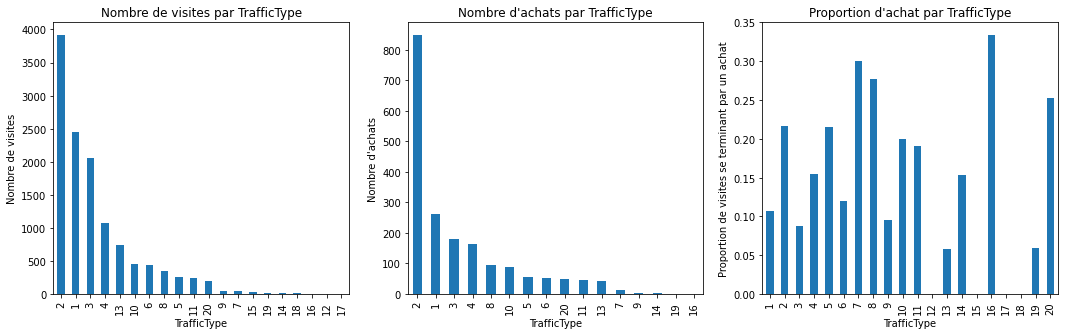

In [ ]:
analyse_graphique(dataframe, "TrafficType")

On observe ici que le TrafficType joue un rôle particulier dans le taux de conversion, puisque les taux en fonction de celui-ci diffèrent grandement.

Aussi, on remarque que le TrafficType ayant le taux le plus élevé (schéma de droite) est le 16. Or, ce TrafficType ne contient que très peu de visites (schéma de gauche). Pareil pour le 20.

Nous ne donnons donc aucune conclusion quant à cette feature.

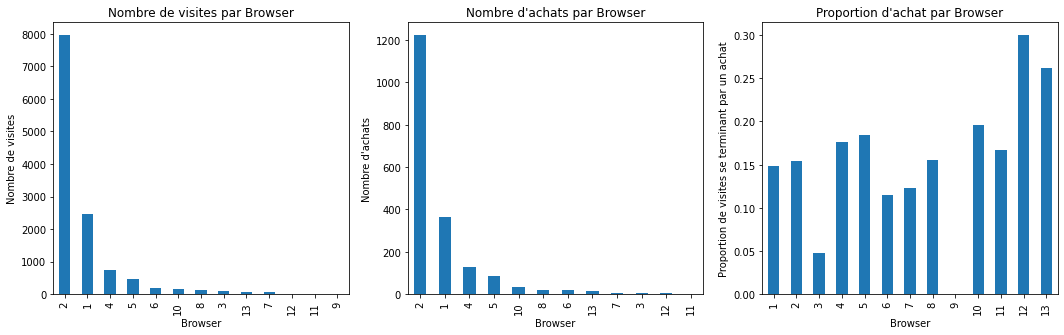

In [ ]:
analyse_graphique(dataframe, "Browser")

On observe ici que le Browser joue un rôle particulier dans le taux de conversion, puisque les taux en fonction de celui-ci diffèrent grandement.

Aussi, on remarque que le Browser ayant le nombre de visites le plus élevé est le 2 (schéma de gaucheà. Or, ce Browser ne contient qu'un faible taux de conversion (schéma de droite).

Nous ne donnons également donc aucune conclusion quant à cette feature.

### Matrice de corrélation

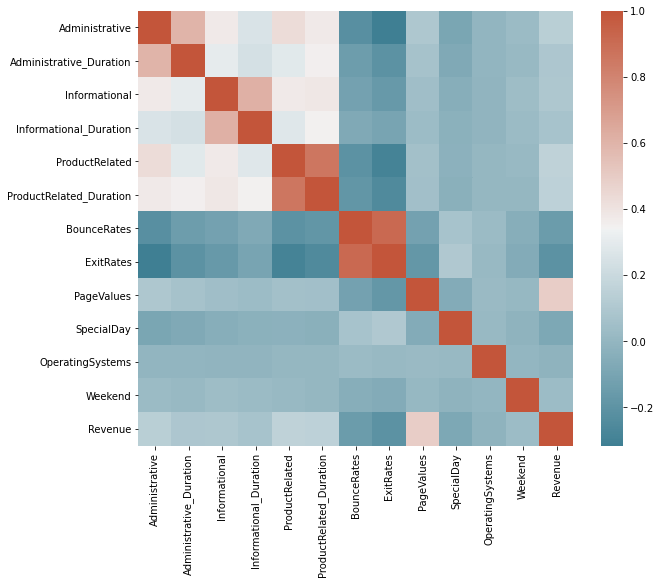

In [ ]:
f, ax = plt.subplots(figsize=(10,8))
corr = dataframe.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220,20, as_cmap=True),square=True, ax=ax)

On observe dans cette matrice de corrélation que la feature PageValues est fortement reliée à à la feature Revenue.

On observe aussi des "carrés" de corrélation rouges, qui sont logiques (Information est forcément correlé à Information Duration)

Text(0.5, 1.0, 'Ratio de conversion pour les week-ends')

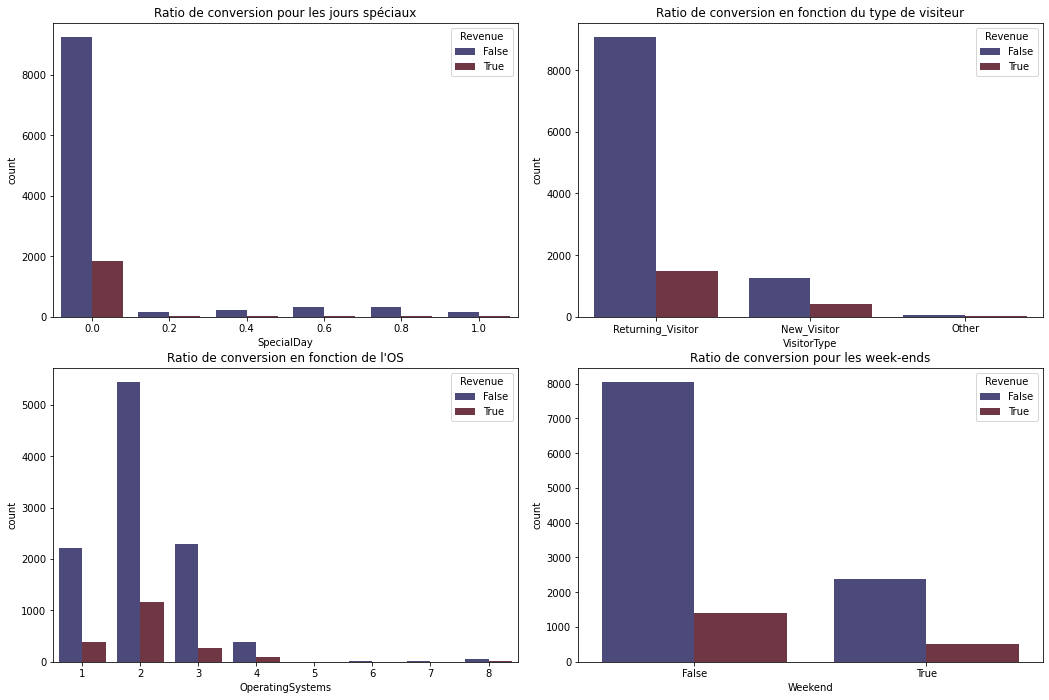

In [ ]:
fig, ax = plt.subplots(2,2,figsize = (15,10))
plt.tight_layout(pad=3)


sns.countplot(data = dataframe, x ='SpecialDay',hue = 'Revenue',ax =ax[0,0],
             palette = "icefire").set_title('Ratio de conversion pour les jours spéciaux')
sns.countplot(data = dataframe, x ='VisitorType',hue = 'Revenue',ax =ax[0,1],
             palette = "icefire").set_title('Ratio de conversion en fonction du type de visiteur')
sns.countplot(data = dataframe, x ='OperatingSystems',hue = 'Revenue',ax =ax[1,0],
             palette = "icefire").set_title('Ratio de conversion en fonction de l\'OS')
sns.countplot(data = dataframe, x ='Weekend',hue = 'Revenue',ax =ax[1,1],
             palette = "icefire").set_title('Ratio de conversion pour les week-ends')

Schéma haut-gauche : On observe que peu de visites sont réalisées lors des special days, ce qui est logique puisqu'il y a peu de special days dans l'année.
Cependant, et ce n'est pas précisé par le dataset, nous nous demandons si les créateurs du dataset ont normalisé l'importance des facteurs SpecialDay en fonction de leur faible nombre dans l'année.

Schéma haut-droite : On observe que le taux de conversion est plus élevé pour les nouveaux visiteurs, qui sont tout de même en bien moins grand nombre que ceux qui reviennent (les habitués du site).

Schéma bas-gauche : L'OS 2 se démarque des autres dans son nombre d'utilisations. Pas d'information particulière concernant les taux de conversion.

Schéma bas-droite : Pas d'information particulière relevée

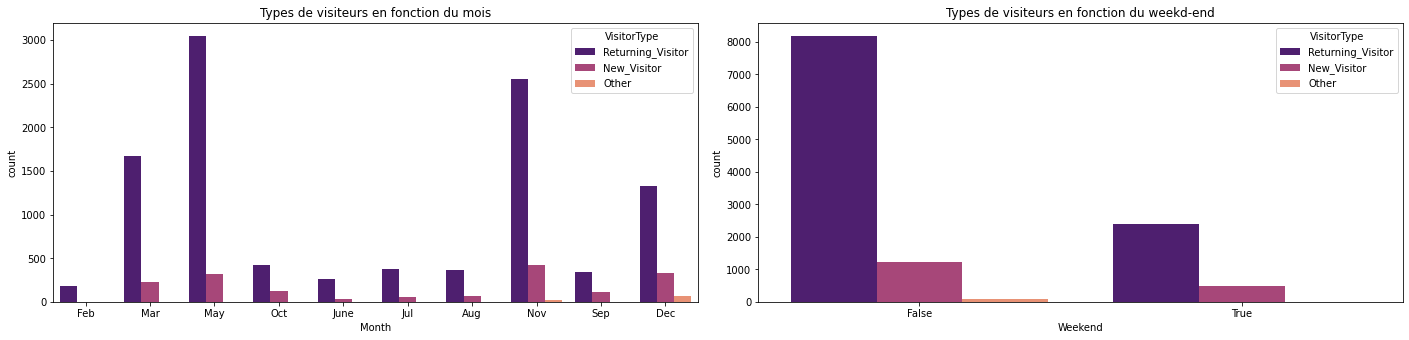

In [ ]:
fig, ax = plt.subplots(1,2,figsize = (20,5))
plt.tight_layout(pad=3)

sns.countplot(data = dataframe, x ='Month',hue = 'VisitorType',ax =ax[0],
             palette = "magma").set_title('Types de visiteurs en fonction du mois');
sns.countplot(data = dataframe, x ='Weekend',hue = 'VisitorType',ax =ax[1],
             palette = "magma").set_title('Types de visiteurs en fonction du weekd-end');


Schéma gauche : Les mois de mars, mai, novembre et décembre se démarquent.

Schéma droite : Pas d'information particulière relevée

In [ ]:
dataframe['Month'].unique()

array(['Feb', 'Mar', 'May', 'Oct', 'June', 'Jul', 'Aug', 'Nov', 'Sep',
       'Dec'], dtype=object)

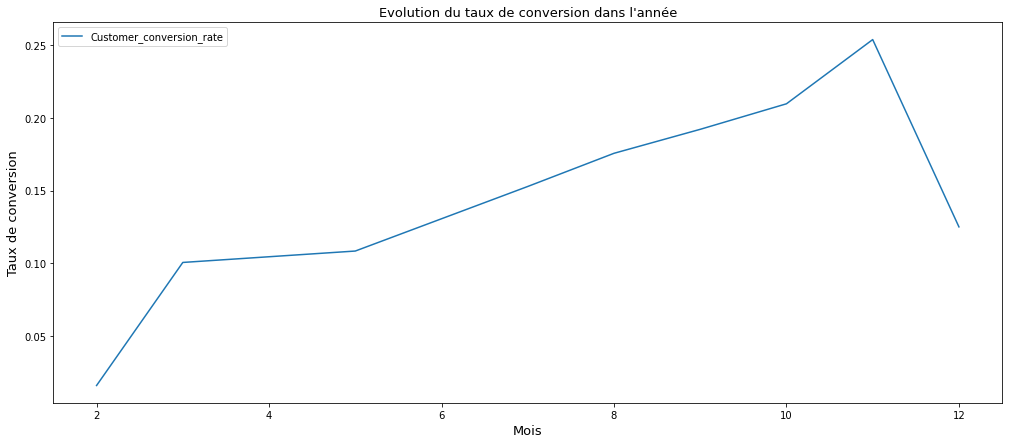

In [ ]:
def map_months(row):
  if row['Month'] == "Jan":
    return 1
  if row['Month'] == "Feb":
    return 2
  if row['Month'] == "Mar":
    return 3
  if row['Month'] == "Apr":
    return 4
  if row['Month'] == "May":
    return 5
  if row['Month'] == "Jun":
    return 6
  if row['Month'] == "Jul":
    return 7
  if row['Month'] == "Aug":
    return 8
  if row['Month'] == "Sep":
    return 9
  if row['Month'] == "Oct":
    return 10
  if row['Month'] == "Nov":
    return 11
  if row['Month'] == "Dec":
    return 12
  
dataframe['MonthIndex'] = dataframe.apply (lambda row: map_months(row), axis=1)
gp = dataframe.groupby(['MonthIndex'])
Order_volume = gp['Revenue'].sum()
unique_visitor_volume = gp['Revenue'].count()
CCR = Order_volume/unique_visitor_volume
CCR = pd.DataFrame(CCR)
CCR.columns = ['Customer_conversion_rate']
fig, (ax1) = plt.subplots(1, figsize=(17,7))
CCR.plot(ax=ax1)

ax1.set_title("Evolution du taux de conversion dans l'année", size=13)
ax1.set_ylabel("Taux de conversion", size=13)
ax1.set_xlabel("Mois", size=13);

Note : Les mois d'avril et janvier ne sont pas présents dans le dataset.

Le taux de conversion atteint son pic en novembre, ce qui est logique sachant que les fêtes de fin d'année arrivent. 
On observe une tendance croissante tout au long de l'année avec une décroissance lors du dernier mois de l'année.

Text(0.5, 1.0, 'Existe t-il une relation entre les BounceRates et les PageValues ?')

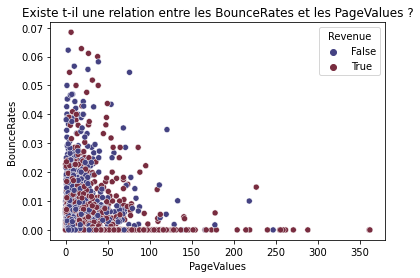

In [ ]:
dataframe_er_br_pv= dataframe[dataframe["PageValues"] != 0]
sns.scatterplot(data = dataframe_er_br_pv, x= 'PageValues',y='BounceRates',hue = 'Revenue',
                palette = "icefire").set_title('Existe t-il une relation entre les BounceRates et les PageValues ?')


Text(0.5, 1.0, 'Existe t-il une relation entre les ExitRates et les PageValues ?')

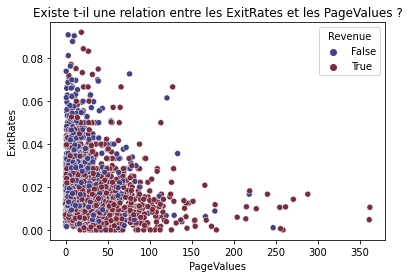

In [ ]:
sns.scatterplot(data = dataframe_er_br_pv, x= 'PageValues',y='ExitRates',hue = 'Revenue',
                palette = "icefire").set_title('Existe t-il une relation entre les ExitRates et les PageValues ?')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


[(0.0, 0.02), (0.0, 90.0)]

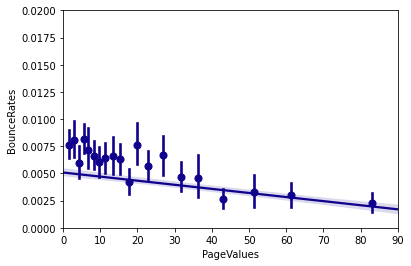

In [ ]:
sns.regplot(x="PageValues", y="BounceRates", data=dataframe_er_br_pv,
            truncate=True,robust = True, x_bins=20, color="#10018c").set(ylim = (0,0.02),xlim=(0,90))


Une limite (90 en abscisse) a été fixée pour construire le modèle. Cela nous a permis d'éviter les outliers.

On observe que donc l'exit rate diminue en fonction du nombre de 
PageValues de façon linéaire. 

Soit, plus l'utilisateur reste connecté, moins son taux d'arrêt de visite est élevé, ce qui est logique et confirme nos opinions préalable.

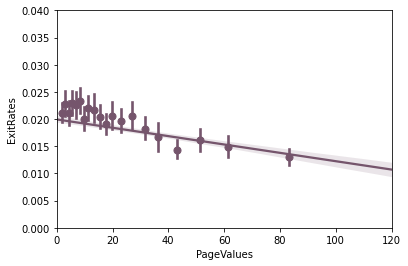

In [ ]:
sns.regplot(x="PageValues", y="ExitRates", data=dataframe_er_br_pv,
            truncate=True, robust = True,x_bins=20, color="#75556c").set(ylim = (0,0.04),xlim=(0,120));

Une limite (120 en abscisse) a été fixée pour construire le modèle. Cela nous a permis d'éviter les outliers.

On observe que donc l'exit rate diminue en fonction du nombre de 
PageValues de façon linéaire. 

Soit, plus l'utilisateur reste connecté, moins son taux d'arrêt de visite est élevé, ce qui est logique et confirme nos opinions préalable.

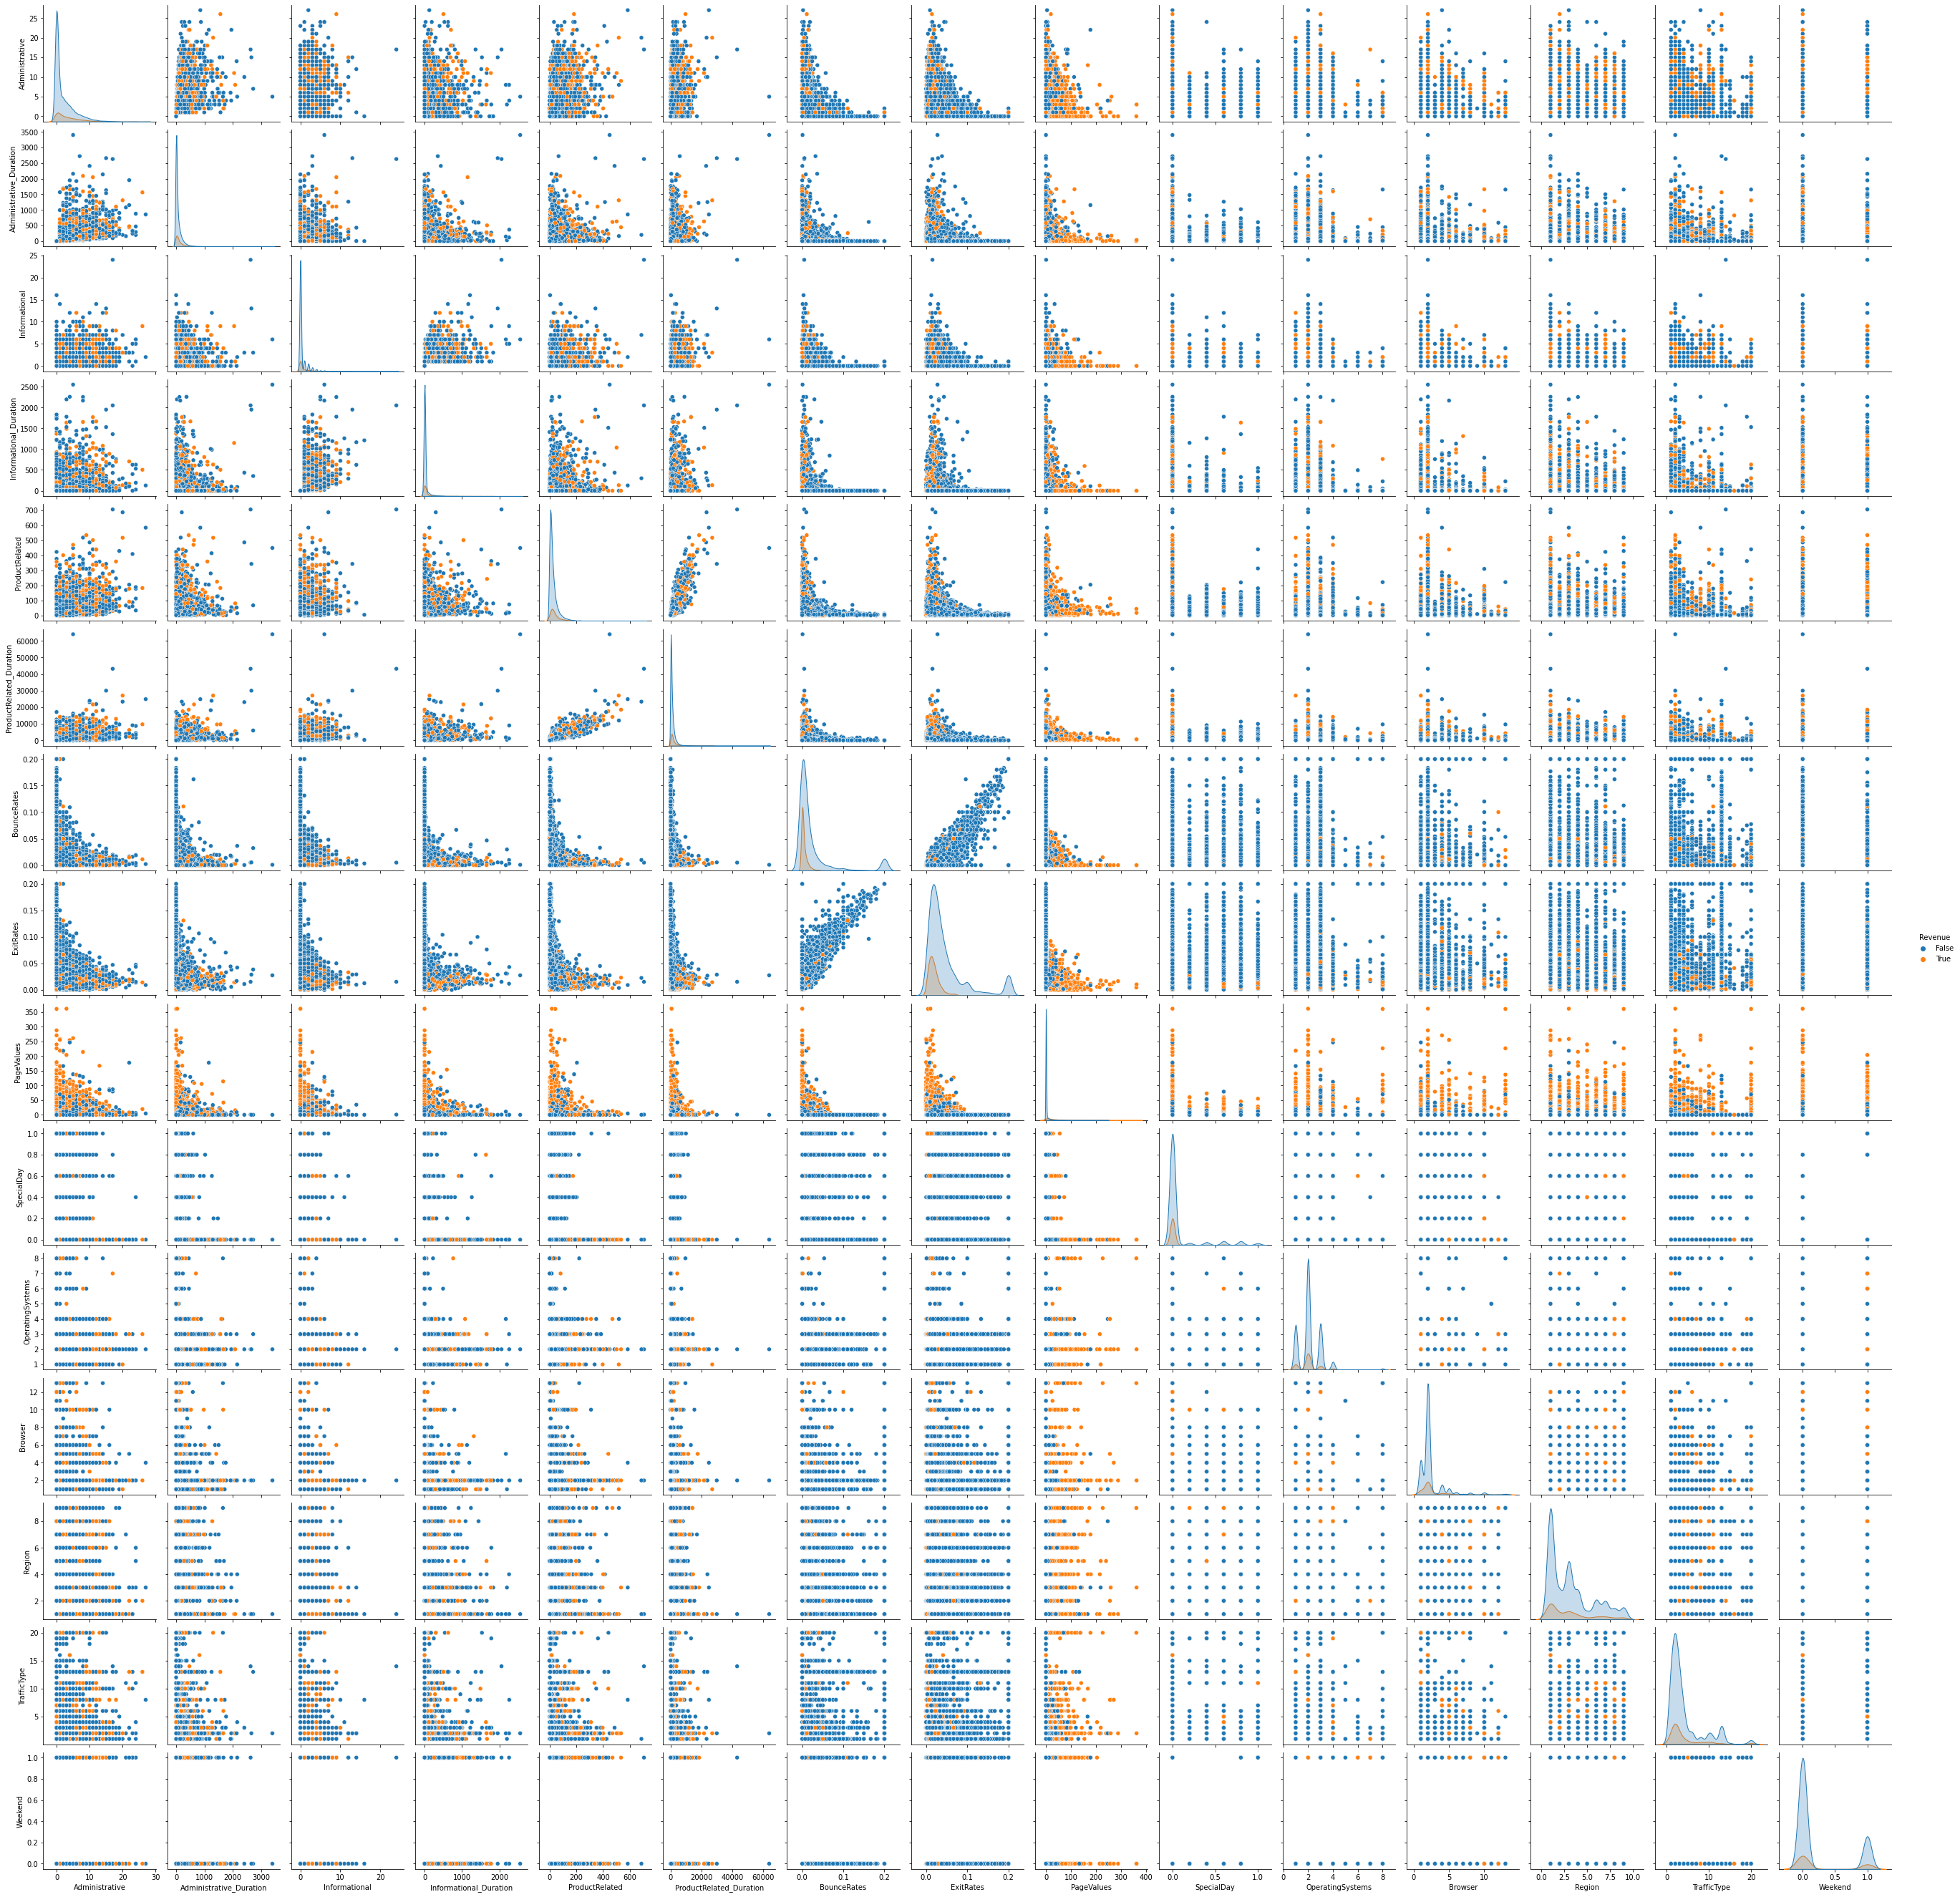

In [16]:
sns.pairplot(dataframe, hue="Revenue")

Enfin, voici un schéma permettant de comprendre les relations entre chaque feature graphiquement, rapidement.

# Analyse poussée des données (Machine learning)

## Modèles de machine learning avec scikit learn

### Utilitaires modèles scikit learn

In [58]:
import sklearn.metrics as metrics
from sklearn.datasets import make_classification
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

import tensorflow.keras as keras

import pickle

In [18]:
def roc_auc(target, predictions):
  fpr, tpr, threshold = metrics.roc_curve(target, predictions)
  roc_auc_result = metrics.auc(fpr, tpr)


  # Plotting ROC Curve
  plt.title('Receiver Operating Characteristic (ROC)')
  plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc_result)
  plt.legend(loc = 'lower right')
  plt.plot([0, 1], [0, 1],'r--')
  plt.xlim([0, 1])
  plt.ylim([0, 1])
  plt.ylabel('True Positive Rate (TPR)')
  plt.xlabel('False Positive Rate (FPR)')
  plt.show()
  return (fpr, tpr, threshold, roc_auc_result)

In [19]:
def plot_feature_importances(model, columns):
    plt.figure(figsize=(20,20))
    plt.barh(range(len(columns)), model.feature_importances_, align='center') 
    plt.yticks(np.arange(len(columns)), columns) 
    plt.xlabel('Importance de la variable')
    plt.ylabel('Variable')

### Preprocessing des données

On retire les données non nécessaires du dataset

In [20]:
shopping_clean = dataframe.drop(['Browser','OperatingSystems','Region','TrafficType'], axis=1)

Création d'un dataframe one-hot encoded permettant d'utiliser par la suite les différents modèles

In [21]:
one_hot_encoded_dataframe = pd.get_dummies(shopping_clean.loc[:, shopping_clean.columns])

Split train et test data

In [22]:
X = one_hot_encoded_dataframe.drop('Revenue', axis=1)
y = one_hot_encoded_dataframe['Revenue']
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=60, test_size=.2)

### Régression logistique

In [23]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred_logreg=logreg.predict(X_test)
y_pred_prob_logreg= logreg.predict_proba(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [24]:
logreg_accuracy = sklearn.metrics.accuracy_score(y_test, y_pred_logreg)
print("Accuracy pour la logistic regression : ", logreg_accuracy)

Accuracy pour la logistic regression :  0.8860502838605029


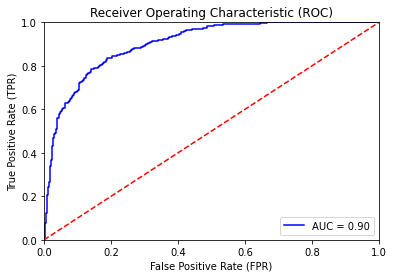

In [25]:
fpr_logreg, tpr_logreg, threshold_logreg, roc_auc_result_logreg = roc_auc(y_test, y_pred_prob_logreg[:,1])

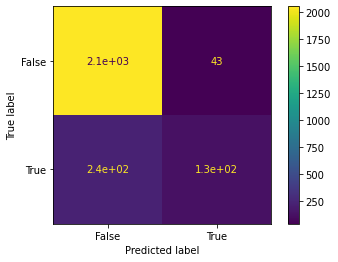

In [26]:
plot_confusion_matrix(logreg, X_test, y_test)  
plt.show()  

In [27]:
pickle.dump(logreg, open('logistic_regression.pickle', 'wb'))

### Création d'un arbre de classification

In [35]:
tree_clf = tree.DecisionTreeClassifier()
tree_clf = tree_clf.fit(X_train, y_train)
tree_predictions = tree_clf.predict(X_test)

In [29]:
tree_accuracy = sklearn.metrics.accuracy_score(y_test, tree_predictions)
print("Accuracy pour une arbre de classification : ", tree_accuracy)

Accuracy pour une arbre de classification :  0.864963503649635


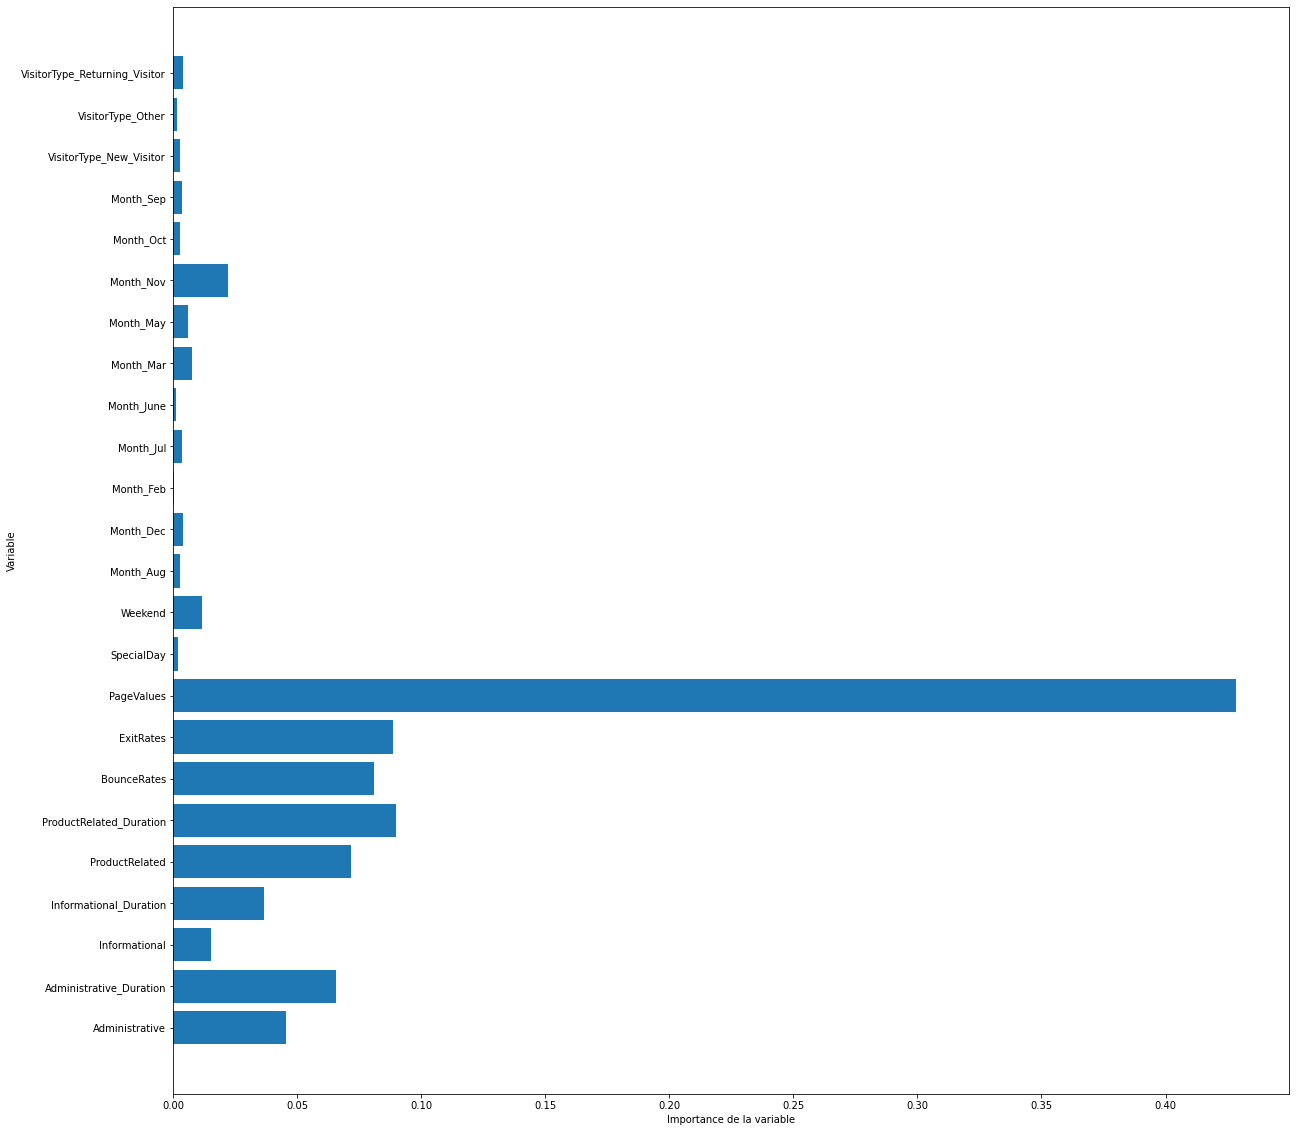

In [30]:
plot_feature_importances(tree_clf, X_train.columns)

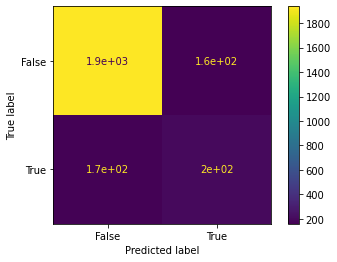

In [ ]:
plot_confusion_matrix(tree_clf, X_test, y_test)  
plt.show()  

In [ ]:
pickle.dump(tree_clf, open('decision_tree.pickle', 'wb'))

### Random forest

GRID SEARCH RANDOM FOREST

In [ ]:
parameters = {  'n_estimators' : [10, 50, 100, 500, 1000]}
grid = GridSearchCV(RandomForestClassifier(), parameters, n_jobs=-1)
grid.fit(X_train, y_train)
print(grid.best_score_, grid.best_estimator_)

0.9012578532295523 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


In [ ]:
rfc = RandomForestClassifier(random_state = 9,n_estimators=1000)
rfc.fit(X_train, y_train)
y_pred_rfc = rfc.predict(X_test)
y_prob_rfc = rfc.predict_proba(X_test)[:, 1]
print('Random Forest Classifier model accuracy(in %):', round(metrics.accuracy_score(y_test, y_pred_rfc)*100,2))

Random Forest Classifier model accuracy(in %): 90.67


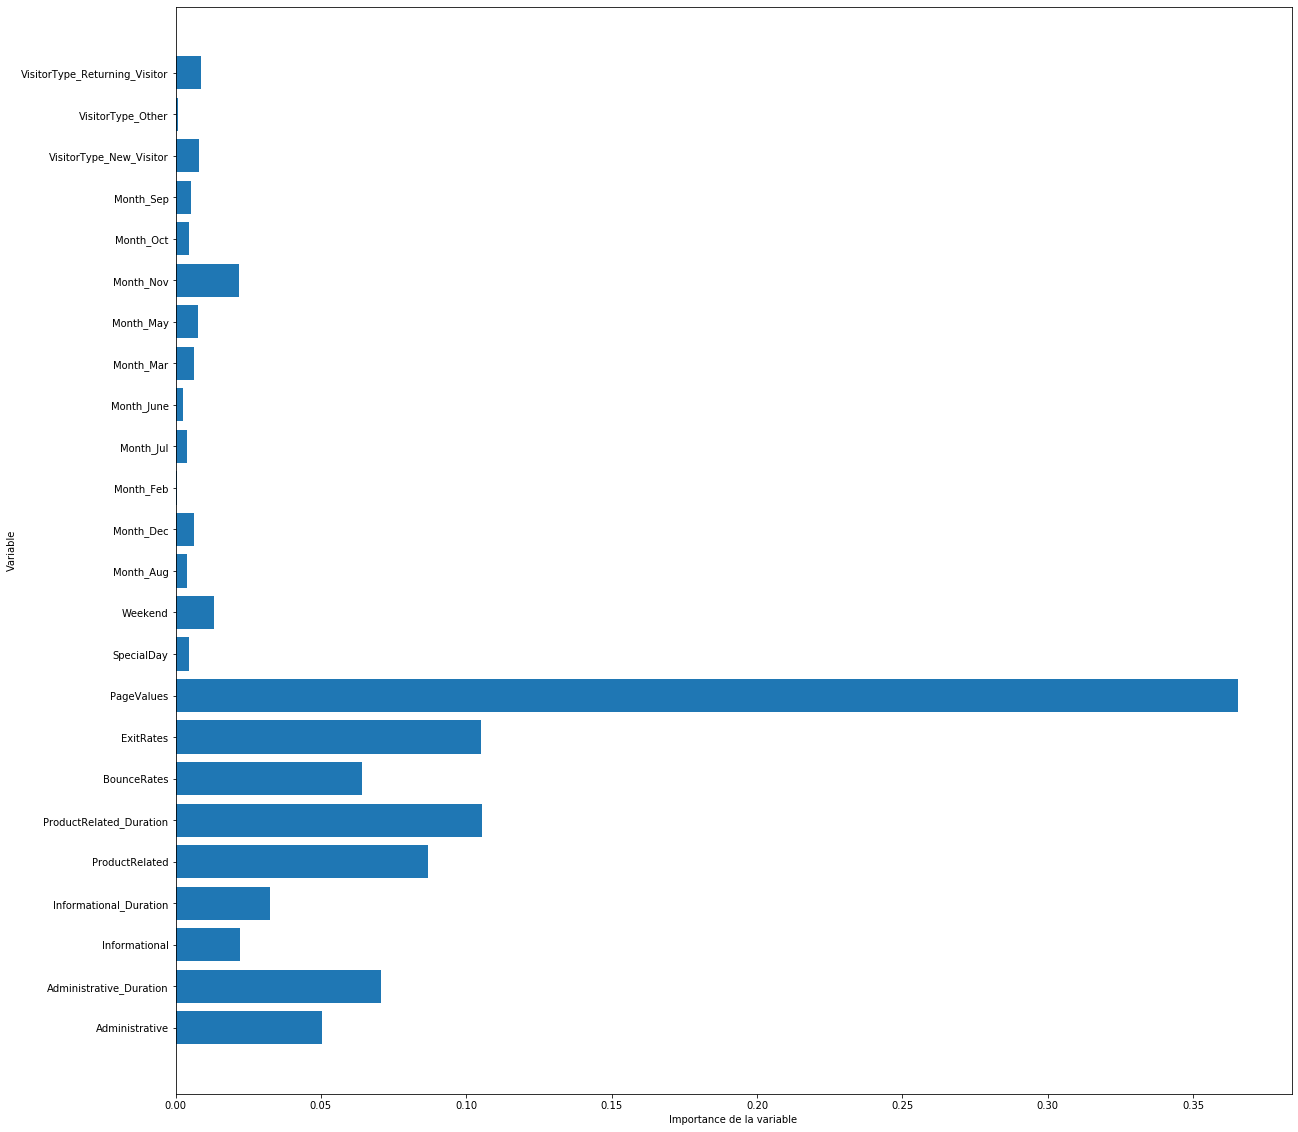

In [ ]:
plot_feature_importances(rfc, X_train.columns)

In [ ]:
rf_predictions = rfc.predict(X_test)
rf_predictions_probabilities = rfc.predict_proba(X_test)

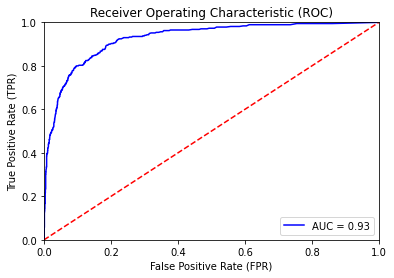

In [ ]:
fpr_rf, tpr_rf, threshold_rf, roc_auc_result_rf = roc_auc(y_test, rf_predictions_probabilities[:,1])

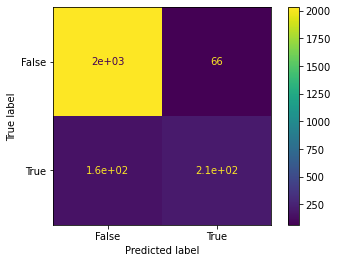

In [ ]:
plot_confusion_matrix(rfc, X_test, y_test)  
plt.show()  

In [ ]:
pickle.dump(rfc, open('random_forest.pickle', 'wb'))

### Gaussian Naive Bayes

In [ ]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred_gnb=gnb.predict(X_test)
y_pred_prob_gnb = gnb.predict_proba(X_test)

In [ ]:
gnb_accuracy = sklearn.metrics.accuracy_score(y_test, y_pred_gnb)
print("Accuracy pour le Gaussian Naive Bayes : ", gnb_accuracy)

Accuracy pour le Gaussian Naive Bayes :  0.8057583130575832


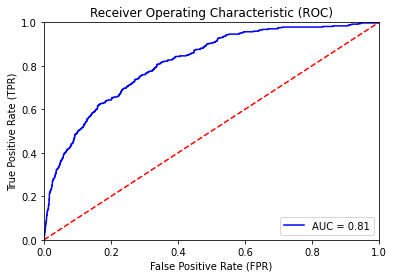

In [ ]:
fpr_gnb, tpr_gnb, threshold_gnb, roc_auc_result_gnb = roc_auc(y_test, y_pred_prob_gnb[:,1])

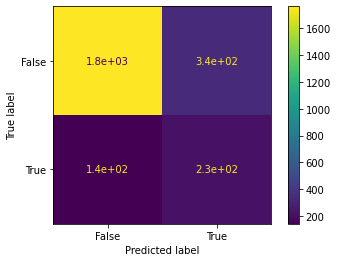

In [ ]:
plot_confusion_matrix(gnb, X_test, y_test)  
plt.show()  

In [ ]:
pickle.dump(gnb, open('naive_bayes.pickle', 'wb'))

## Création du modèle d'un réseau de neuronnes

Création d'un nouveau dataframe éliminant le problème de l'imbalance data.

Ce problème a conduit précedemment (non présent dans ce notebook) à obtenir un réseau de neuronnes avec une bonne accuracy, mais qui prédisait toujours la même valeur pour la target variable (proche de 0) afin de minimiser sa loss.

In [91]:
dataframe_dl = dataframe.sample(frac=1) #Shuffle
revenue_dataframe = dataframe_dl[dataframe_dl['Revenue'] == 1]
non_revenue_dataframe = dataframe_dl[dataframe_dl['Revenue'] == 0]
non_revenue_dataframe = dataframe_dl.head(revenue_dataframe.shape[0])
dataframe_dl = pd.concat([revenue_dataframe, non_revenue_dataframe], axis=0)
dataframe_dl = dataframe_dl.sample(frac=1) #Shuffle
dataframe_dl_clean = dataframe_dl.drop(['Browser','OperatingSystems','Region','TrafficType'], axis=1)
one_hot_encoded_dataframe_dl = pd.get_dummies(dataframe_dl_clean.loc[:, dataframe_dl_clean.columns])

In [92]:
X = one_hot_encoded_dataframe_dl.drop('Revenue', axis=1)
y = one_hot_encoded_dataframe_dl['Revenue']
X = np.asarray(X).astype('float32')
y = np.asarray(y).astype('float32')

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=60, test_size=.2)

In [103]:
number_features = X.shape[1]

model = keras.Sequential([
    keras.layers.Dense(number_features, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(1, activation='relu')
])

model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])


In [104]:
model_history = model.fit(x=X, y=y, epochs=5, validation_split=0.7, batch_size=32)

Epoch 1/5
36/36 [==============================] - 1s 9ms/step - loss: 6.6330 - accuracy: 0.5614 - val_loss: 8.9652 - val_accuracy: 0.4188
Epoch 2/5
36/36 [==============================] - 0s 4ms/step - loss: 8.8988 - accuracy: 0.4231 - val_loss: 8.9652 - val_accuracy: 0.4188
Epoch 3/5
36/36 [==============================] - 0s 5ms/step - loss: 8.7318 - accuracy: 0.4339 - val_loss: 8.9652 - val_accuracy: 0.4188
Epoch 4/5
36/36 [==============================] - 0s 4ms/step - loss: 9.2839 - accuracy: 0.3981 - val_loss: 8.9652 - val_accuracy: 0.4188
Epoch 5/5
36/36 [==============================] - 0s 4ms/step - loss: 9.0870 - accuracy: 0.4109 - val_loss: 8.9652 - val_accuracy: 0.4188


In [105]:
model_history.history

{'accuracy': [0.4895104765892029,
  0.4274475574493408,
  0.4274475574493408,
  0.4274475574493408,
  0.4274475574493408],
 'loss': [7.819283962249756,
  8.83159351348877,
  8.831592559814453,
  8.831591606140137,
  8.831592559814453],
 'val_accuracy': [0.41878741979599,
  0.41878741979599,
  0.41878741979599,
  0.41878741979599,
  0.41878741979599],
 'val_loss': [8.96517276763916,
  8.96517276763916,
  8.96517276763916,
  8.96517276763916,
  8.96517276763916]}

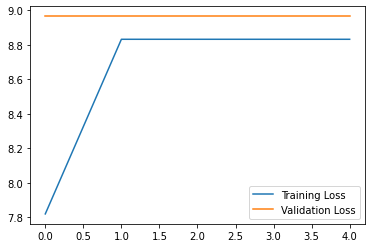

In [106]:
plt.plot(model_history.history['loss'], label='Training Loss')
plt.plot(model_history.history['val_loss'], label='Validation Loss')
plt.legend()

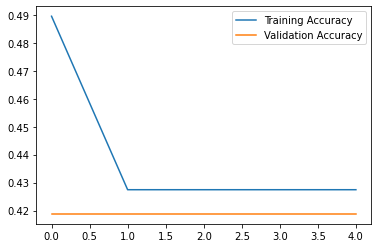

In [107]:
plt.plot(model_history.history['accuracy'], label='Training Accuracy')
plt.plot(model_history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()

In [108]:
predictions_target = model.predict(X_test)


In [109]:
mean_squared_loss = np.sum((predictions_target - y_test) ** 2)
mean_squared_loss

350676.0

Malgré que nous ayons géré le problème de l'imbalance data, les résultats ne sont pas satisfaisants.

Nous pensons que cela est dû à un manque de données pour entraîner le modèle.